<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python </h2>
</div>

# Détection de faux billets

Dans ce projet, nous travaillons avec un ensemble de données de 1500 billets, contenant des informations géométriques ainsi que leur nature (vrai ou faux). Notre objectif est de construire un modèle capable de prédire si un billet est vrai ou faux, en se basant sur ces informations.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Importation des librairies</h3>
</div>

In [1]:
# Librairies pour la manipulation des données :
import pandas as pd
import numpy as np
from scipy import stats
from patsy import dmatrices
from sklearn.model_selection import train_test_split  

# Librairies pour la visualisation :
import seaborn as sns
import matplotlib.pyplot as plt

# Librairies pour la prétraitement des données :
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, auc, adjusted_rand_score,
                             confusion_matrix, classification_report, r2_score, 
                             mean_squared_error, roc_curve)  # Ajout de roc_curve
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from scipy.stats import mannwhitneyu, t

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation des fichiers
billets = pd.read_csv('billets.csv', delimiter=";")
billets_test = pd.read_csv('billets_production_test.csv', delimiter=";")

In [3]:
billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Analyse exploratoire du fichier billets</h3>
</div>

In [4]:
print('Nombre de lignes', billets.shape[0])

Nombre de lignes 1500


In [5]:
print('Nombre de colonnes', billets.shape[1])

Nombre de colonnes 7


In [6]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [8]:
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [9]:
# Doublons
billets.duplicated().sum()

0

In [10]:
# Valeurs manquantes
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [11]:
# Valeurs manquantes dans la colonne 'margin_low'
valeurs_manquantes_margin_low = billets['margin_low'].isna()

# Afficher les lignes contenant des valeurs manquantes dans la colonne 'margin_low'
print(billets[valeurs_manquantes_margin_low])


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53 

In [12]:
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Profil des billets</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Distribution des variables</h3>
</div>

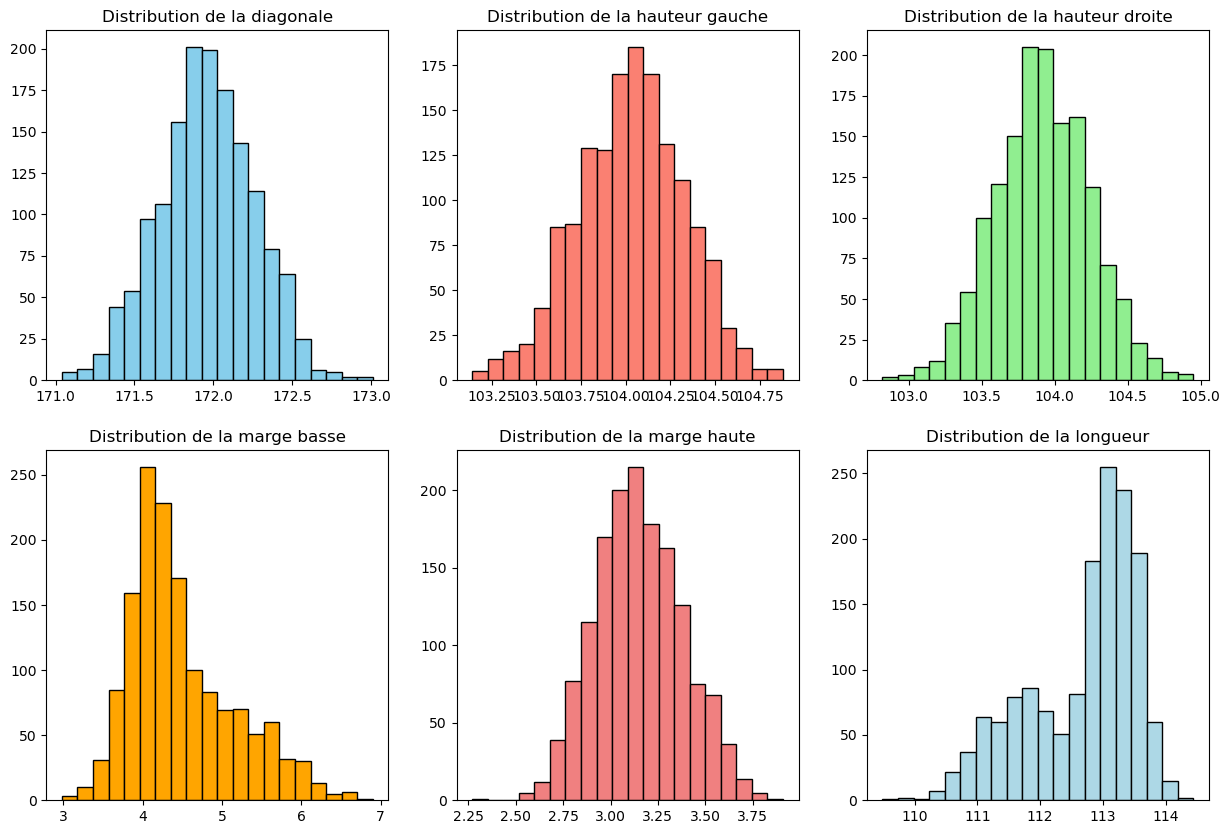

In [13]:
# Histogrammes pour chaque dimension des billets
plt.figure(figsize=(15, 10))

# Diagonale
plt.subplot(2, 3, 1)
plt.hist(billets['diagonal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de la diagonale')

# Hauteur gauche
plt.subplot(2, 3, 2)
plt.hist(billets['height_left'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution de la hauteur gauche')

# Hauteur droite
plt.subplot(2, 3, 3)
plt.hist(billets['height_right'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution de la hauteur droite')

# Marge basse
plt.subplot(2, 3, 4)
plt.hist(billets['margin_low'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution de la marge basse')

# Marge haute
plt.subplot(2, 3, 5)
plt.hist(billets['margin_up'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution de la marge haute')

# Longueur
plt.subplot(2, 3, 6)
plt.hist(billets['length'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution de la longueur')

plt.show()

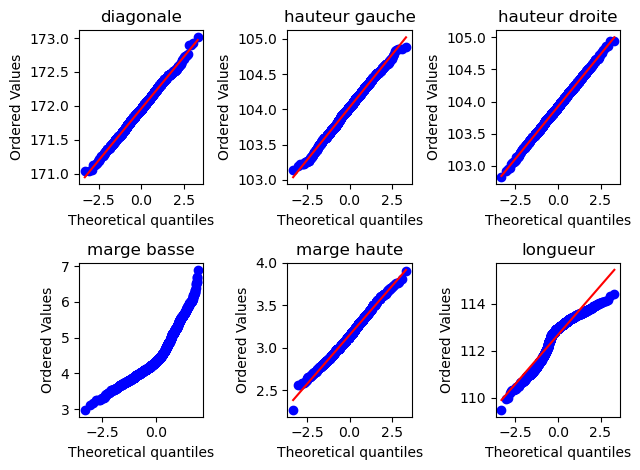

In [14]:
# Q-Q plot pour chaque dimension des billets
plt.subplot(2, 3, 1)
stats.probplot(billets['diagonal'], dist="norm", plot=plt)
plt.title('diagonale')

plt.subplot(2, 3, 2)
stats.probplot(billets['height_left'], dist="norm", plot=plt)
plt.title('hauteur gauche')

plt.subplot(2, 3, 3)
stats.probplot(billets['height_right'], dist="norm", plot=plt)
plt.title('hauteur droite')

plt.subplot(2, 3, 4)
stats.probplot(billets['margin_low'], dist="norm", plot=plt)
plt.title('marge basse')

plt.subplot(2, 3, 5)
stats.probplot(billets['margin_up'], dist="norm", plot=plt)
plt.title('marge haute')

plt.subplot(2, 3, 6)
stats.probplot(billets['length'], dist="norm", plot=plt)
plt.title('longueur')

plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Relation entre les variables</h3>
</div>

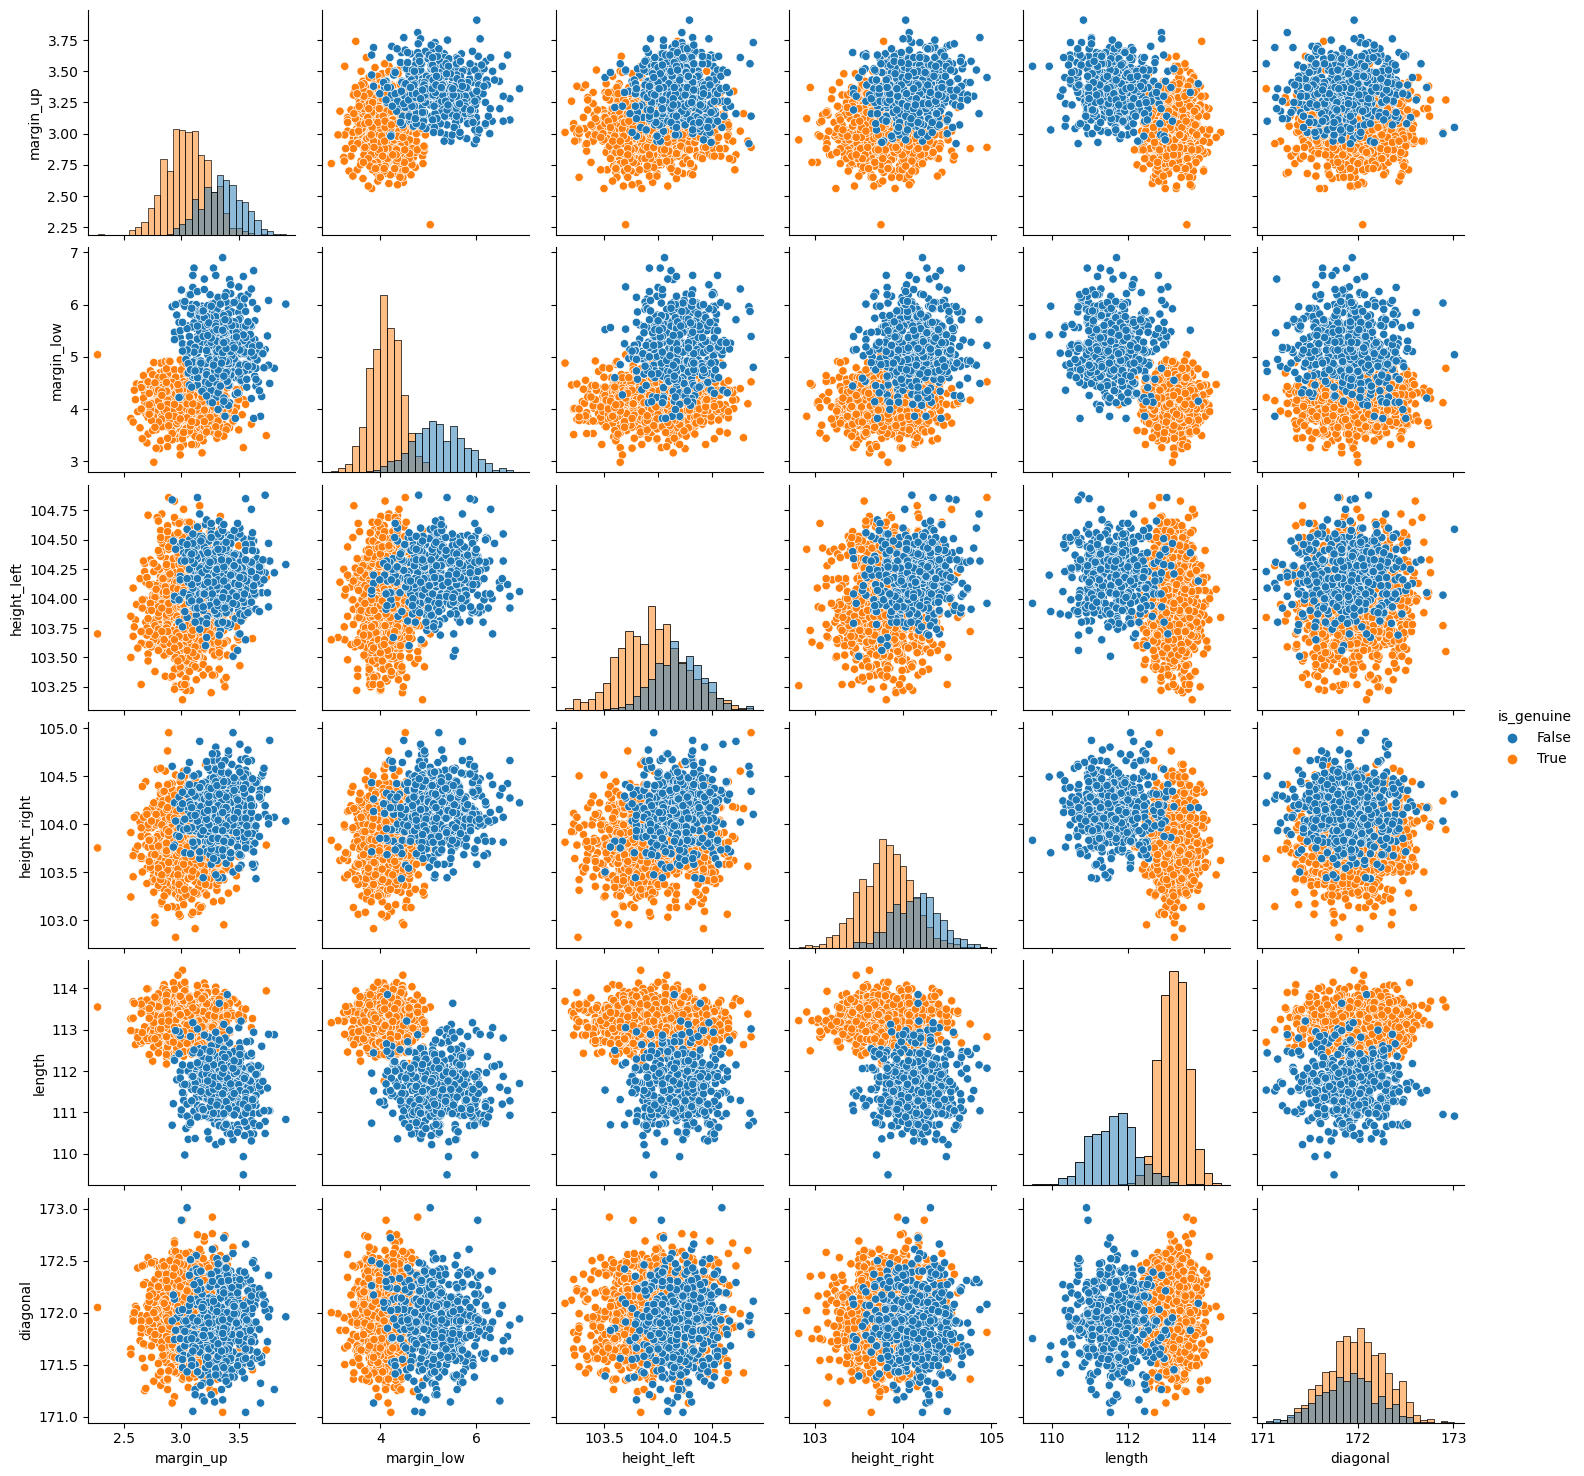

In [15]:
# Sélectionner les variables numériques pour le pairplot
variables_numeriques = ['margin_up', 'margin_low', 'height_left', 'height_right', 'length', 'diagonal']

# Créer le pairplot avec distinction par la variable is_genuine
sns.pairplot(billets, vars=variables_numeriques, hue='is_genuine', diag_kind='hist') # True = bleu, False = Rouge
plt.show()

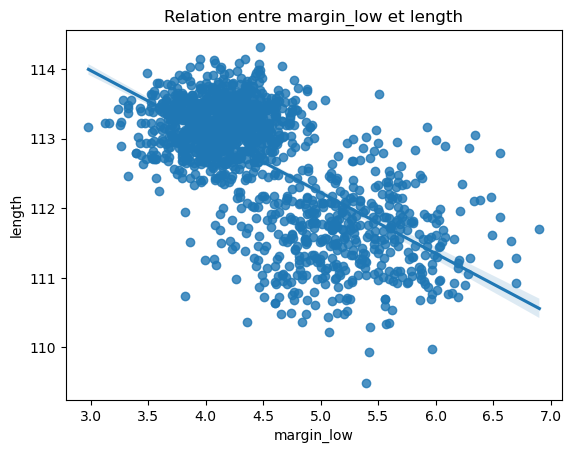

In [16]:
# Tracer la relation entre length et margin_low avec regplot
sns.regplot(x='margin_low', y='length', data=billets)
plt.xlabel('margin_low')
plt.ylabel('length')
plt.title('Relation entre margin_low et length')
plt.show()

In [17]:
# Coeffficient de corrélation
# Supprimer la colonne 'is_genuine' du DataFrame
billets_corr = billets.drop(columns=['is_genuine'])
billets_corr.corr()

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.019472     -0.024492   -0.111534  -0.055649   
height_left   0.019472     1.000000      0.242279    0.302643   0.246522   
height_right -0.024492     0.242279      1.000000    0.391085   0.307005   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.055649     0.246522      0.307005    0.431606   1.000000   
length        0.097587    -0.320863     -0.401751   -0.666753  -0.520575   

                length  
diagonal      0.097587  
height_left  -0.320863  
height_right -0.401751  
margin_low   -0.666753  
margin_up    -0.520575  
length        1.000000

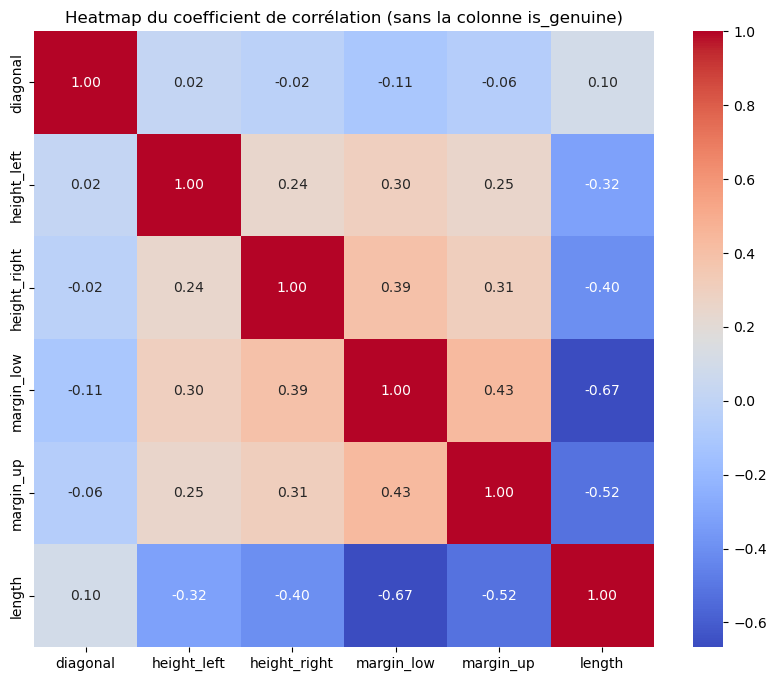

In [18]:
# Heatmap du coef de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(billets_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap du coefficient de corrélation (sans la colonne is_genuine)')
plt.show()

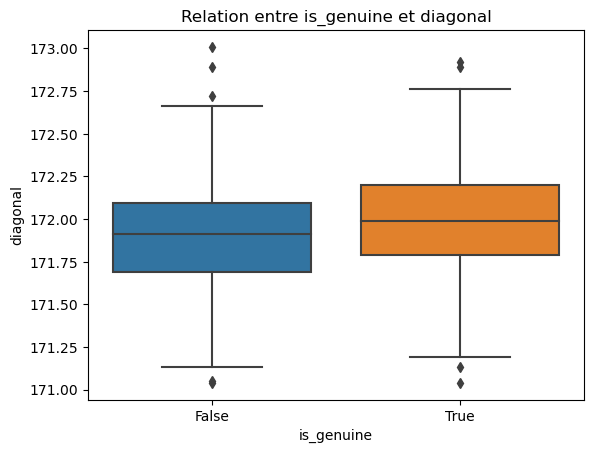

In [19]:
# Boxplot relation entre is_genuine et diagonal 
sns.boxplot(x='is_genuine', y='diagonal', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('diagonal')
plt.title('Relation entre is_genuine et diagonal')
plt.show()

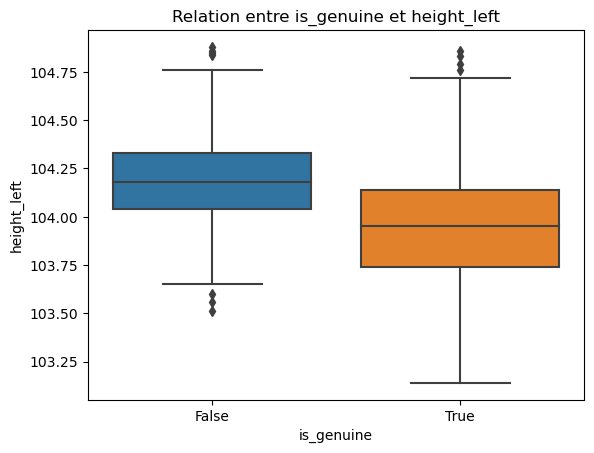

In [20]:
# Boxplot relation entre is_genuine et height_left
sns.boxplot(x='is_genuine', y='height_left', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('height_left')
plt.title('Relation entre is_genuine et height_left')
plt.show()

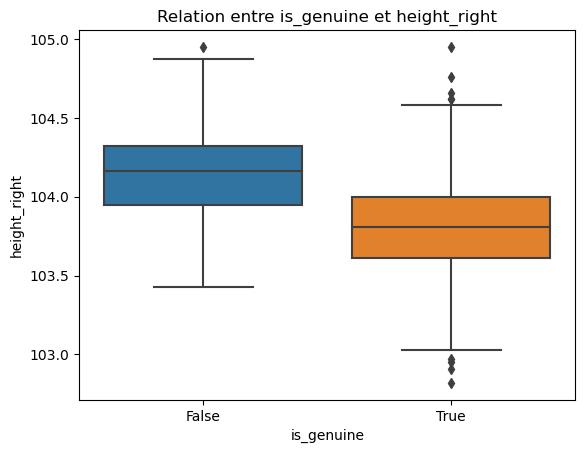

In [21]:
# Boxplot relation entre is_genuine et height_left
sns.boxplot(x='is_genuine', y='height_right', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('height_right')
plt.title('Relation entre is_genuine et height_right')
plt.show()

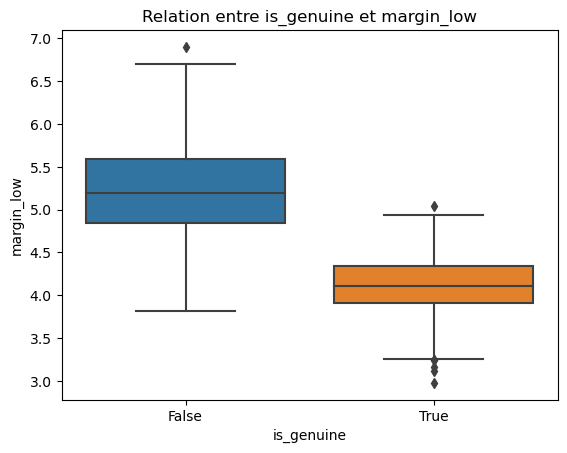

In [22]:
# Boxplot relation entre is_genuine et margin_low
sns.boxplot(x='is_genuine', y='margin_low', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('margin_low')
plt.title('Relation entre is_genuine et margin_low')
plt.show()


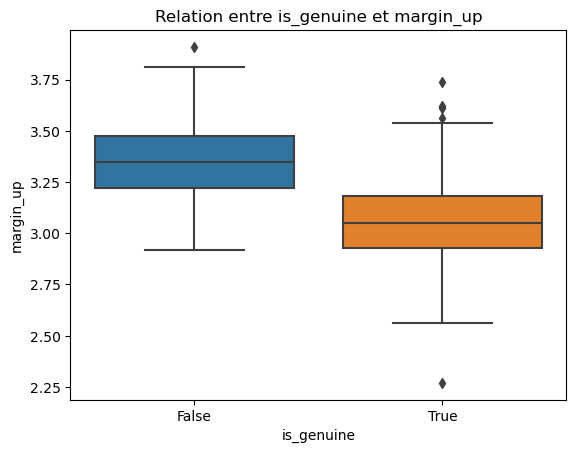

In [23]:
# Boxplot relation entre is_genuine et margin_up
sns.boxplot(x='is_genuine', y='margin_up', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('margin_up')
plt.title('Relation entre is_genuine et margin_up')
plt.show()

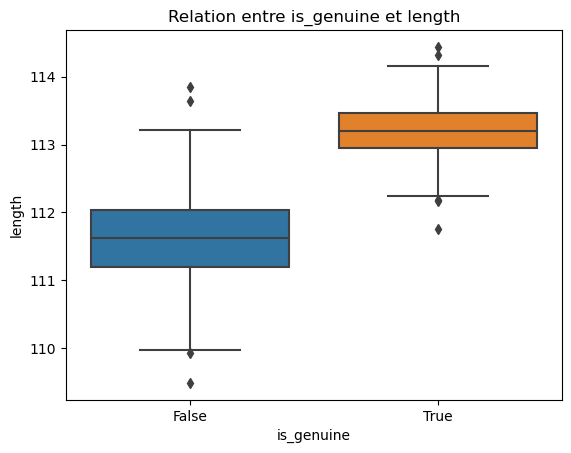

In [24]:
# Boxplot relation entre is_genuine et length
sns.boxplot(x='is_genuine', y='length', data=billets)
plt.xlabel('is_genuine')
plt.ylabel('length')
plt.title('Relation entre is_genuine et length')
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Régression linéaire</h2>
</div>

Comprendre la relation entre une variable dépendante (cible) et une ou plusieurs variables indépendantes (caractéristiques). Son objectif principal est de modéliser cette relation sous forme d'une ligne droite, qui permet de prédire la valeur de la variable dépendante en fonction des valeurs des variables indépendantes.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 Choix des variables explicatives</h3>
</div>

Text(0.5, 1.0, 'Corrélation de chaque variable avec la variable cible')

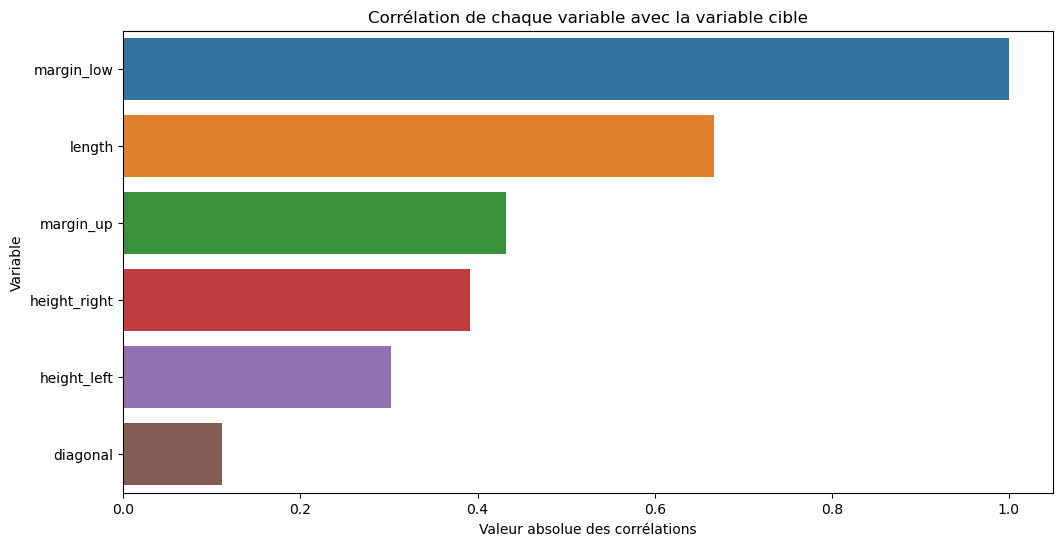

In [25]:
# Graphique de corrélation de chaque variable à la variable cible
correlations = abs(billets_corr.corr()['margin_low']).sort_values(ascending=False) 
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Valeur absolue des corrélations')
plt.ylabel('Variable')
plt.title('Corrélation de chaque variable avec la variable cible')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 Standardisation des variables numériques</h3>
</div>

In [26]:
# Sélectionner les colonnes numériques à standardiser
numeric_cols = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# StandardScaler
scaler = StandardScaler()

# Standardiser les données numériques
billets[numeric_cols] = scaler.fit_transform(billets[numeric_cols])

# Afficher les premières lignes du DataFrame standardisé
print(billets.head())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True -0.486540     2.774123      3.163240    0.051286  -1.128325   
1        True -1.633729    -2.236535     -0.799668   -1.078937  -0.696799   
2        True  2.397823     1.504756     -1.291191   -0.129549  -0.912562   
3        True -1.961498    -0.399294      0.060498   -1.304982  -0.610494   
4        True -0.748754     0.836669     -1.414072   -0.672057   1.417677   

     length  
0  0.173651  
1  0.471666  
2  0.551901  
3  0.953075  
4 -0.158750  


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.  Modélisation de données pour l'entrianement 'Train' </h3>
</div>

In [27]:
# Préparer les ensembles de données pour l'entraînement et la prédiction
# Ensembles pour l'entraînement (sans valeurs NaN pour 'margin_low')
train_df = billets.dropna(subset=['margin_low'])
predict_df = billets[billets['margin_low'].isna()]

In [28]:
# Choisir les caractéristiques et la variable cible
features = ['margin_up', 'length', 'height_right']
target = 'margin_low'

# Séparer les caractéristiques et la variable cible pour l'ensemble d'entraînement
X_train = train_df[features]
y_train = train_df[target]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Créer le DataFrame d'entraînement (df_train)
df_train = pd.DataFrame(data=X_train, columns=['margin_up', 'length', 'height_right'])
df_train['margin_low'] = y_train

# Créer le DataFrame de test (df_test)
df_test = pd.DataFrame(data=X_test, columns=['margin_up', 'length', 'height_right'])
df_test['margin_low'] = y_test

In [29]:
reg_multi = smf.ols('margin_low~length+margin_up+height_right - 1', data=df_train).fit() # -1 pour enlver Intercept
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:             margin_low   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              324.6
Date:                Sun, 05 May 2024   Prob (F-statistic):                   3.18e-153
Time:                        19:24:01   Log-Likelihood:                         -1311.4
No. Observations:                1170   AIC:                                      2629.
Df Residuals:                    1167   BIC:                                      2644.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [30]:
# Faire des prédictions sur df_train
y_predict_train = reg_multi.predict(train_df[['length', 'margin_up', 'height_right']])

In [31]:
# Calculer R² sur l'ensemble d'entraînement
r2_train = r2_score(train_df['margin_low'], y_predict_train)
print("R² (Train):", r2_train)

# Calculer MSE sur l'ensemble d'entraînement
mse_train = mean_squared_error(train_df['margin_low'], y_predict_train)
print("MSE (Train):", mse_train)

# Calculer RMSE sur l'ensemble d'entraînement
rmse_train = np.sqrt(mse_train)
print("RMSE (Train):", rmse_train)

# Calculer MAPE sur l'ensemble d'entraînement
mape_train = np.mean(np.abs((train_df['margin_low'] - y_predict_train) / train_df['margin_low'])) * 100
print("MAPE (Train):", mape_train)

R² (Train): 0.4687830300990522
MSE (Train): 0.5312169699009478
RMSE (Train): 0.7288463280424399
MAPE (Train): 259.02714487064895


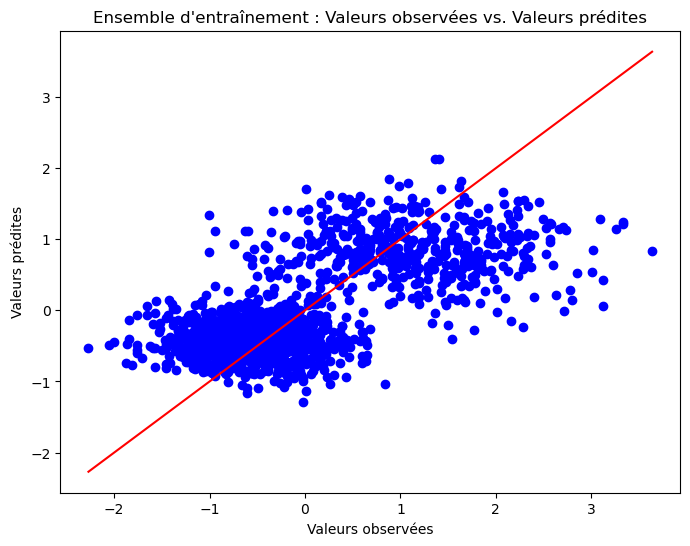

In [32]:
# Tracer un graphique des valeurs observées par rapport aux valeurs prédites sur l'ensemble d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(train_df['margin_low'], y_predict_train, color='blue')
plt.xlabel('Valeurs observées')
plt.ylabel('Valeurs prédites')
plt.title('Ensemble d\'entraînement : Valeurs observées vs. Valeurs prédites')
plt.plot([min(train_df['margin_low']), max(train_df['margin_low'])], [min(train_df['margin_low']), max(train_df['margin_low'])], color='red')  # Ajouter la ligne d'identité
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.  Hypothèses </h3>
</div>

### ° Linéarité
### ° Tester l’homoscédasticité
### ° Vérifier la colinéarité des variables
### ° Tester la normalité 
### ° Moyenne des termes erreur
### ° Auto-corrélation

### ° Calcul des levier
### ° Calcul des résidus
### ° Calcul la distance de Cook




<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1   Linéarité  </h3>
</div>

In [33]:
# Récupérer les résidus du modèle de régression
residuals = reg_multi.resid

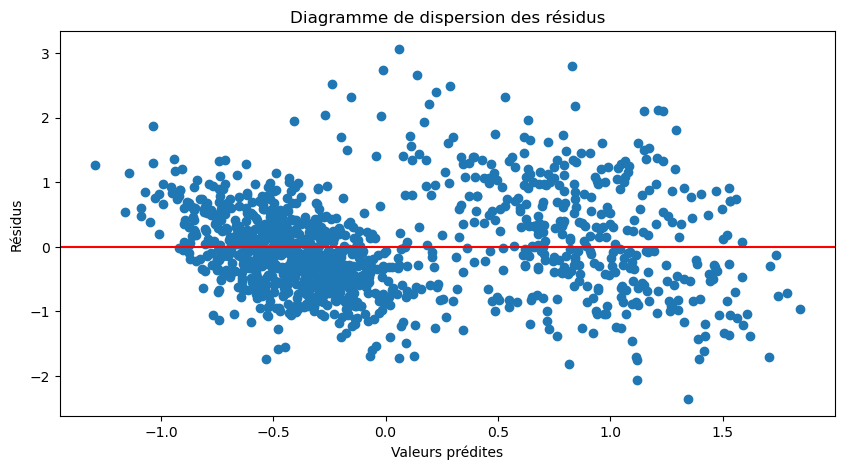

In [34]:
# Diagramme de dispersion des résidus par rapport aux valeurs prédites
plt.figure(figsize=(10, 5))
plt.scatter(reg_multi.fittedvalues, residuals)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Diagramme de dispersion des résidus')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2   Tester l’homoscédasticité  </h3>
</div>

C:\Users\33621\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


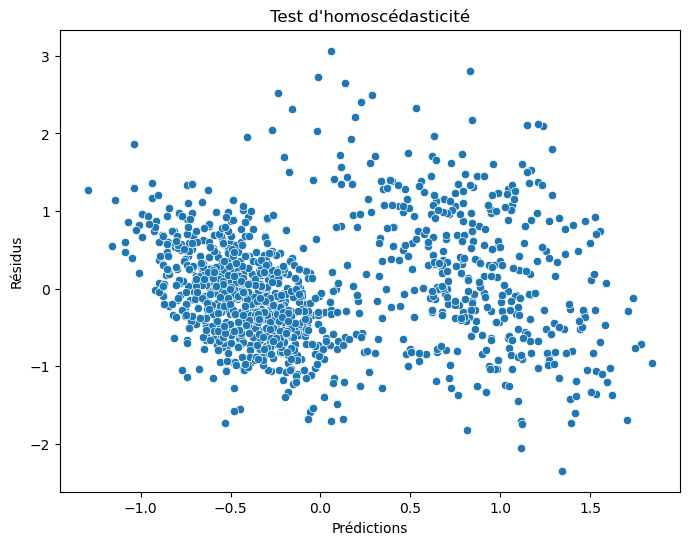

In [35]:
residuals = y_train - y_predict_train
plt.figure(figsize=(8, 6))
sns.scatterplot(y_predict_train, residuals)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [36]:
# Test de Breusch-Pagan (évalue la constance des valeurs prédites)
bp_test = sm.stats.diagnostic.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)
print('Test de Breusch-Pagan : statistique = %f, p-value = %f' % (bp_test[0], bp_test[1]))

Test de Breusch-Pagan : statistique = 49.253760, p-value = 0.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3   Multicolinéarité   </h3>
</div>

In [37]:
# Calculer le VIF avec les données standardisées
vif= pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif['Features'] = X_train.columns
print(vif)

   VIF Factor      Features
0    1.415230     margin_up
1    1.534391        length
2    1.204511  height_right


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4  La normalité    </h3>
</div>

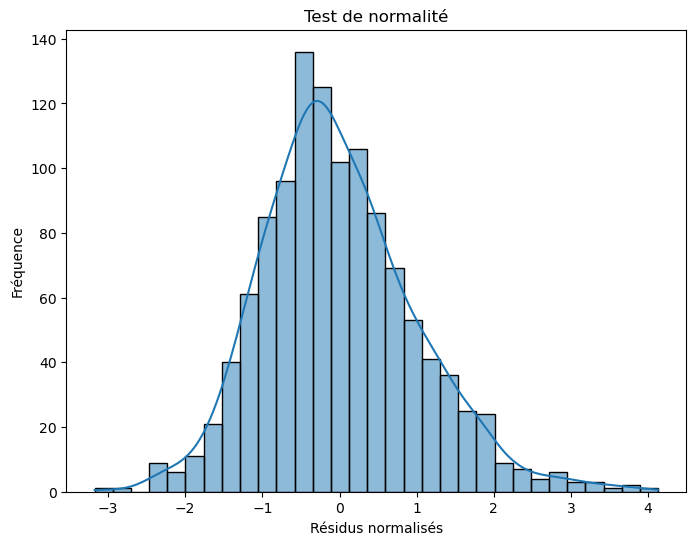

In [38]:
# Test de normalité
resid_norm = reg_multi.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()

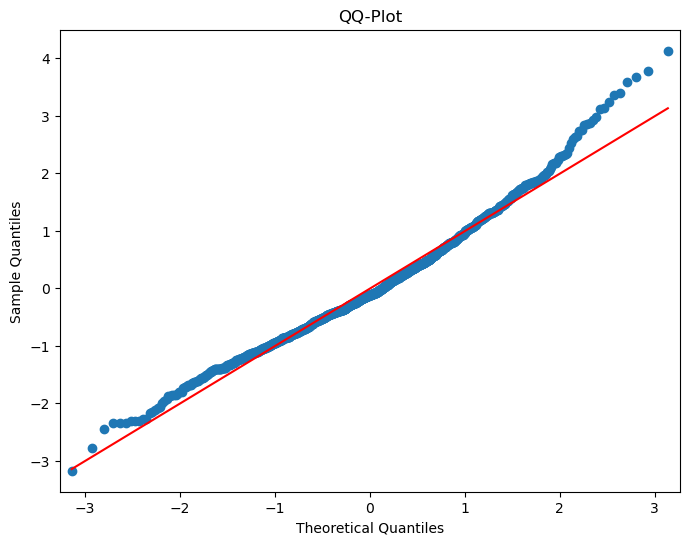

In [39]:
# QQ-plot 
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(resid_norm, line='s', ax=ax)
ax.set_title('QQ-Plot')
plt.show()

In [40]:
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(resid_norm)

#Test de Kolmogorov-Smirnov
ks_test = stats.kstest(resid_norm, 'norm')

# Mettre les résulats dans un df
df_normality = pd.DataFrame({
    'Test de normalité':['Shapiro-Wilk', 'Kolmogorov-Smirnov'],
    'Statistique':[shapiro_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, ks_test.pvalue]
})

print(df_normality)

    Test de normalité  Statistique       p-value
0        Shapiro-Wilk     0.982493  1.134930e-10
1  Kolmogorov-Smirnov     0.058924  5.668431e-04


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5  Vérifier l'auto corrélation     </h3>
</div>

In [41]:
# Test d'auto corrélation
dw_test = durbin_watson(reg_multi.resid)
print('Test de Durbin-Watson : statistique = %f' % dw_test)

Test de Durbin-Watson : statistique = 1.973050


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6  Moyenne des termes d'erreur     </h3>
</div>

In [42]:
resid_norm.mean()

-0.008735954988994267

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.   Analyse des résidus     </h3>
</div>

In [43]:
alpha = 0.05

In [44]:
n = df_train.shape[0] # nombre total d'observations dans l'échantillon entrainement 
p = 3 # Nombre de variable explicatives dans le modèle

In [45]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.1   Calculer les leviers     </h3>
</div>Les leviers mesurent la distance d'une observation par rapport au centre de gravité des observations dans l'espace des prédicteurs

In [46]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag # Matrice du chapeau

seuil_levier = 2*p/n

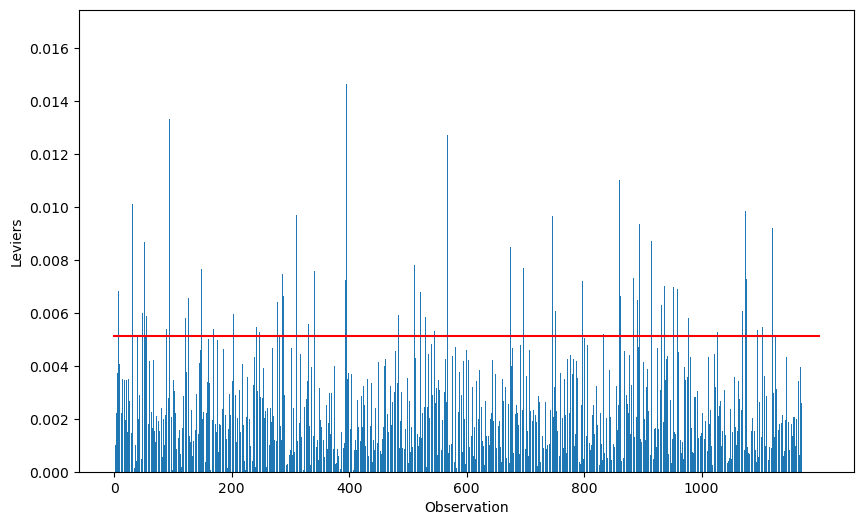

In [47]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_levier, seuil_levier], color='r')
plt.show()

In [48]:
analyses.loc[analyses['levier'] > seuil_levier, :]

obs    levier
6        7  0.006821
12      13  0.009216
30      31  0.010134
47      48  0.005993
49      50  0.006706
...    ...       ...
1120  1121  0.009202
1124  1125  0.007216
1128  1129  0.005330
1151  1152  0.006831
1160  1161  0.010331

[121 rows x 2 columns]

In [49]:
# Filtrer les leviers pour les observations filtrées (influence disproportionnée sur l'estimation des paramètres du modèle )
leviers_filtres = analyses.loc[analyses['levier'] <= seuil_levier]
leviers_filtres

obs    levier
0        1  0.003170
1        2  0.001011
2        3  0.003657
3        4  0.002224
4        5  0.003742
...    ...       ...
1165  1166  0.003200
1166  1167  0.000629
1167  1168  0.000637
1168  1169  0.003966
1169  1170  0.002587

[1049 rows x 2 columns]

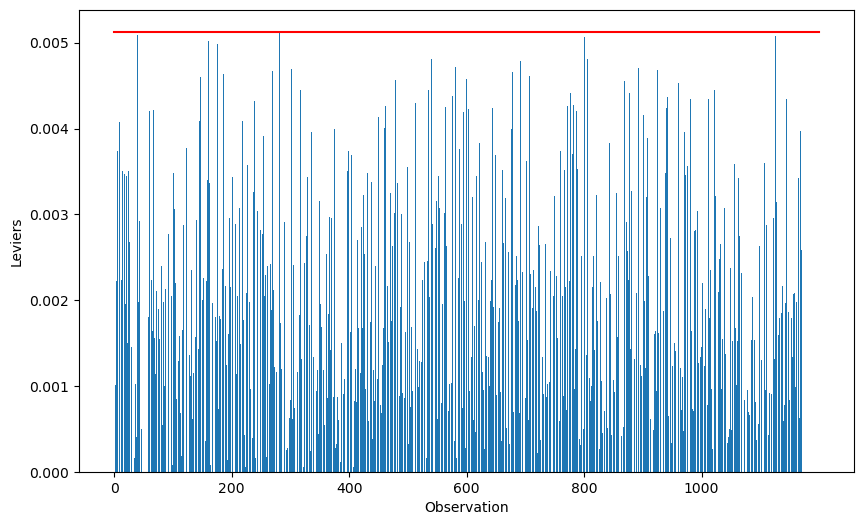

In [50]:
# Tracer les leviers pour les observations filtrées
plt.figure(figsize=(10,6))
plt.bar(leviers_filtres['obs'], leviers_filtres['levier'])  # Utiliser leviers_filtres['obs'] pour l'axe x et leviers_filtres['levier'] pour les hauteurs des barres
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_levier, seuil_levier], color='r')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.2   Calculer les résidus studentisés     </h3>
</div>Standardiser les résidus et les diviser par l'erreur standart estimée

In [51]:
# Convertir le tableau NumPy en une série Pandas
rstudent_series = pd.Series(reg_multi.get_influence().resid_studentized_internal)

# Calculer 'rstudent' pour les observations filtrées
analyses['rstudent'] = rstudent_series.loc[analyses.index]

# Calculer le seuil pour 'rstudent'
seuil_rstudent = t.ppf(1-alpha/2, n-p-1)

In [52]:
# Filtrer les observations avec 'rstudent' supérieur et inférieure au seuil
outliers_rstudent = analyses.loc[(analyses['rstudent'] > 2) | (analyses['rstudent'] < -2)]
outliers_rstudent

obs    levier  rstudent
26      27  0.000525 -2.272513
30      31  0.010134 -2.301902
52      53  0.005176 -2.341060
93      94  0.013331  2.532929
96      97  0.002052  2.930438
116    117  0.001982  2.287640
129    130  0.001110 -2.088174
131    132  0.002210  2.179407
147    148  0.007654  2.067548
150    151  0.002520 -2.305043
163    164  0.000081  2.594174
179    180  0.005852  3.582138
182    183  0.007805 -3.174610
190    191  0.001246  2.644701
191    192  0.001364  3.777833
231    232  0.000959  3.392481
238    239  0.004318  2.631084
250    251  0.000729  2.299525
284    285  0.001203  3.128929
295    296  0.001845  3.239106
336    337  0.008898  2.984746
366    367  0.005250  2.033723
402    403  0.000123  2.108025
417    418  0.000511  2.026865
424    425  0.002582  3.121724
450    451  0.005118  2.832293
477    478  0.004370 -2.148120
493    494  0.000858  2.299870
535    536  0.005441  2.867608
556    557  0.000802  4.129209
614    615  0.000465  2.746863
637    638  0.003340  2.174278
657    658  0.000934 -2.066701
684    685  0.002518 -2.342570
694    695  0.002332 -2.351813
717    718  0.002867 -2.452630
753    754  0.000521 -2.124029
768    769  0.003890  2.165923
810    811  0.000819  2.226895
812    813  0.001000  3.354791
837    838  0.002028  2.334053
842    843  0.003834  2.170242
862    863  0.003500  2.431800
879    880  0.000217  2.317985
891    892  0.000816 -2.305261
893    894  0.009382 -2.171051
896    897  0.000613  3.676419
926    927  0.001621  2.357413
965    966  0.000721 -2.001366
991    992  0.002296 -2.271503
1011  1012  0.004341  2.846551
1019  1020  0.004614 -2.781085
1153  1154  0.001013  2.731503

In [53]:
# Filtrer les leviers pour les observations où la colonne 'rstudent' est comprise entre -2 et 2
rstudent_filtres = analyses.loc[(analyses['rstudent'] <= 2) & (analyses['rstudent'] >= -2)]
rstudent_filtres

obs    levier  rstudent
0        1  0.003170 -1.197752
1        2  0.001011 -0.025051
2        3  0.003657  1.577673
3        4  0.002224  0.354880
4        5  0.003742  1.322194
...    ...       ...       ...
1165  1166  0.003200  1.310709
1166  1167  0.000629  0.856512
1167  1168  0.000637  0.053522
1168  1169  0.003966 -0.269563
1169  1170  0.002587  1.292156

[1117 rows x 3 columns]

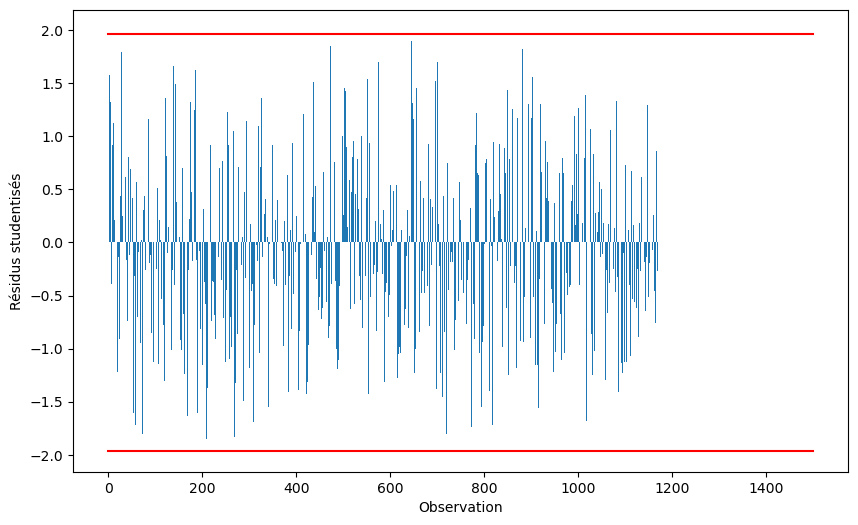

In [54]:
plt.figure(figsize=(10,6))
plt.bar(rstudent_filtres['obs'], rstudent_filtres['rstudent'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4.3   Déterminer la distance de Cook     </h3>
</div>Elle mesure à quel point les prédictions du modèle changent lorsque chaque observation est exclue du modèle.

In [55]:
influence = reg_multi.get_influence().summary_frame()

In [56]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

In [57]:
outliers_dcooks = analyses.loc[analyses['dcooks'] > seuil_dcook, :]
outliers_dcooks

obs    levier  rstudent    dcooks
40      41  0.001980 -0.743378  0.003710
48      49  0.002474  0.565474  0.004568
52      53  0.005176 -2.341060  0.008084
176    177  0.000728  0.476305  0.004113
239    240  0.000160  0.329044  0.003472
243    244  0.003044 -0.853212  0.006752
367    368  0.001417  0.715819  0.003925
375    376  0.000169 -0.859786  0.003714
452    453  0.000781  0.351151  0.003958
577    578  0.000397 -0.565389  0.004725
664    665  0.005449  0.582146  0.028894
804    805  0.002125  0.784917  0.004122
897    898  0.001110  0.414706  0.004617
924    925  0.004686 -0.575799  0.009322
974    975  0.000852  0.339265  0.003436
1006  1007  0.001900  1.023567  0.003603
1021  1022  0.004447  1.237193  0.003440
1022  1023  0.001244 -0.155270  0.006877
1023  1024  0.003212 -0.014812  0.003871
1027  1028  0.004691 -0.869081  0.013757
1031  1032  0.002657 -1.616985  0.003755
1036  1037  0.002018  0.275326  0.008716
1041  1042  0.010255  0.101435  0.011776
1042  1043  0.002502  0.993778  0.004816
1047  1048  0.000503 -0.140014  0.004080
1048  1049  0.002373  0.071348  0.003540
1060  1061  0.001523 -0.259563  0.009505
1064  1065  0.002748  0.169747  0.003507
1074  1075  0.009855 -1.409438  0.014880
1075  1076  0.001222 -0.251882  0.006463
1087  1088  0.001766  1.458923  0.003464
1089  1090  0.001541  0.752289  0.011950
1090  1091  0.001199  1.065584  0.004307
1092  1093  0.007066 -1.139941  0.006043
1093  1094  0.000370 -0.587848  0.004284
1094  1095  0.005343 -1.229283  0.006591
1110  1111  0.002880 -0.458362  0.004564
1113  1114  0.000424  0.668975  0.005256
1124  1125  0.007216 -0.615369  0.014996
1130  1131  0.001589  0.183046  0.003433
1132  1133  0.001789 -0.269866  0.003626
1133  1134  0.001929  1.300252  0.007305
1134  1135  0.000677  0.620051  0.025177
1143  1144  0.000138 -0.647320  0.010852
1163  1164  0.000618 -0.868182  0.003618
1166  1167  0.000629  0.856512  0.005003

In [58]:
# Filtrer les leviers pour les observations filtrées
dcooks_filtres = analyses.loc[analyses['dcooks'] <= seuil_dcook]
dcooks_filtres

obs    levier  rstudent    dcooks
0        1  0.003170 -1.197752  0.000191
1        2  0.001011 -0.025051  0.000181
2        3  0.003657  1.577673  0.000205
3        4  0.002224  0.354880  0.000319
4        5  0.003742  1.322194  0.001539
...    ...       ...       ...       ...
1160  1161  0.010331  0.257144  0.001118
1161  1162  0.001977 -1.531358  0.001838
1162  1163  0.001129 -0.461758  0.000040
1165  1166  0.003200  1.310709  0.000059
1167  1168  0.000637  0.053522  0.001440

[859 rows x 4 columns]

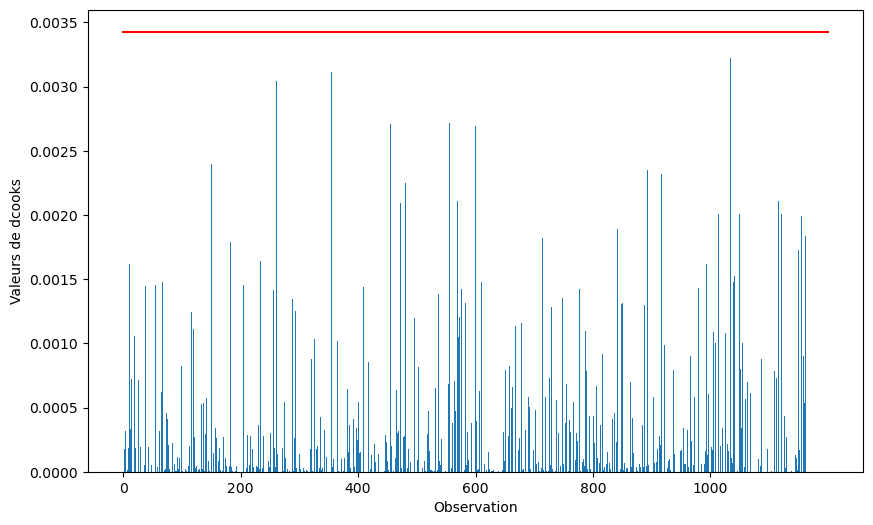

In [59]:
# Tracer les valeurs de dcooks pour les observations dont les valeurs dépassent le seuil
plt.figure(figsize=(10,6))
plt.bar(dcooks_filtres['obs'], dcooks_filtres['dcooks'])  
plt.xticks(np.arange(0, 1200, step=200))
plt.xlabel('Observation')
plt.ylabel('Valeurs de dcooks')
plt.plot([0, 1200], [seuil_dcook, seuil_dcook], color='r')
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5.   Phase de Test    </h3>
</div>

In [60]:
# Prédire les valeurs sur l'ensemble de test
y_pred = reg_multi.predict(X_test)

# Calculer R² sur l'ensemble de test
r2_test = r2_score(y_test, y_pred)
print("R²:", r2_test)

# Calculer MSE sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculer RMSE sur l'ensemble de test
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculer MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

R²: 0.5273243280784858
MSE: 0.4524517433116705
RMSE: 0.6726453324833753
MAPE: 251.59710820360536


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6.   Phase d'imputation     </h3>
</div>

In [61]:
# Sélection des variables indépendantes (toutes les colonnes sauf 'margin_low') pour les valeurs manquantes
X_impute = predict_df.drop('margin_low', axis=1)

# Prédiction des valeurs manquantes en utilisant le modèle entraîné
imputed_values = reg_multi.predict(X_impute)

# Création d'une copie du DataFrame df_impute
predict_df_copy = predict_df.copy()

# Remplacement des valeurs manquantes de 'margin_low' par les valeurs prédites
predict_df_copy['margin_low'] = imputed_values

# Vérification du DataFrame avec les valeurs imputées
print(predict_df_copy)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True -0.060441    -0.466103     -1.444792   -0.216869   0.425168   
99          True -0.093217     0.135176      0.797784   -0.147264  -0.049510   
151         True  0.365659    -0.766742      1.412188   -0.028811  -0.567341   
197         True -1.666506    -1.234404     -0.369585   -0.192357   2.021814   
241         True -0.420986     0.369007      0.429141    0.192612  -0.567341   
251         True -0.519316    -2.570579     -3.380166   -0.889040  -0.869409   
284         True -0.125994    -0.666529     -0.492466   -0.408558   0.338863   
334         True -0.355432    -1.100786      0.121939   -0.479552  -0.653647   
410         True  1.971724    -1.033977     -1.260471   -0.353783  -0.135816   
413         True  1.119526    -1.234404     -1.291191   -0.338727   0.036795   
445         True  1.250634     1.304330     -2.151357   -0.539189  -0.610494   
481         True -0.486540    -1.668661 

In [62]:
# Afficher les valeurs manquantes
predict_df_copy.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [63]:
# Concaténation de train_df et predict_df_copy pour former un DataFrame complet
df_billets = pd.concat([train_df, predict_df_copy])

In [64]:
df_billets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Inverser la standardisation si besoin 

In [65]:
# Inverser la standardisation sur les données imputées
#predict_df_copy[numeric_cols] = scaler.inverse_transform(predict_df_copy[numeric_cols])

# Remplacez les valeurs manquantes de 'margin_low' dans df_billets par les valeurs imputées
#df_billets = predict_df_copy

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Analyse composante principale  </h2>
</div>

Réduire la dimensionnalité, visualiser les données dans un espace de dimension inférieure et prétraiter les données avant d'appliquer d'autres algorithmes d'apprentissage automatique.

In [66]:
# Mettre is_genuine en index 
df_billets.set_index('is_genuine', inplace=True)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.   Choix du nombre de composantes    </h3>
</div>

In [67]:
# ACP
pca = PCA(svd_solver='full')
coord = pca.fit_transform(df_billets)

In [68]:
# Les variances expliquées  (Valeurs propres)
print("Variance expliquée:", pca.explained_variance_)
# Les proportions variances expliquées 
print("Proportion de variance expliquée:", pca.explained_variance_ratio_)

Variance expliquée: [2.58905573 1.01794136 0.78220622 0.71001614 0.57414341 0.31695125]
Proportion de variance expliquée: [0.43220701 0.16993122 0.1305785  0.11852736 0.09584529 0.05291062]


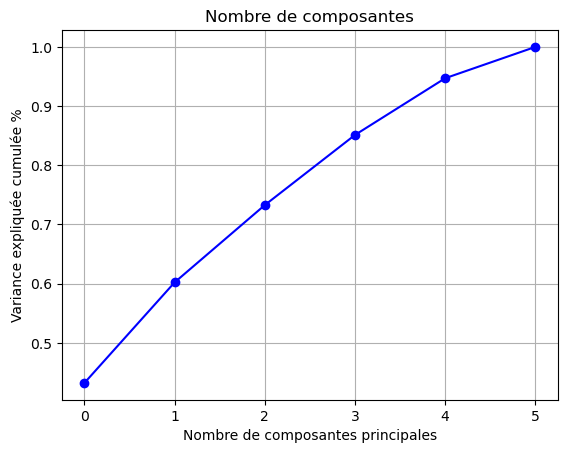

In [69]:
# Graphique de la variance expliquée cumulée pour déterminer le nombre de composantes
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée %')
plt.title('Nombre de composantes')
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1   Définir le nombre de composantes    </h3>
</div>

In [70]:
# pca définir les composantes principales
pca = PCA(n_components=4).fit(df_billets) # Je choisis la composantes apres 80 % 
eigval = pca.explained_variance_  # les valeurs propres de l'ACP
coord = pca.fit_transform(df_billets)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2   Visualisation des composantes    </h3>
</div>

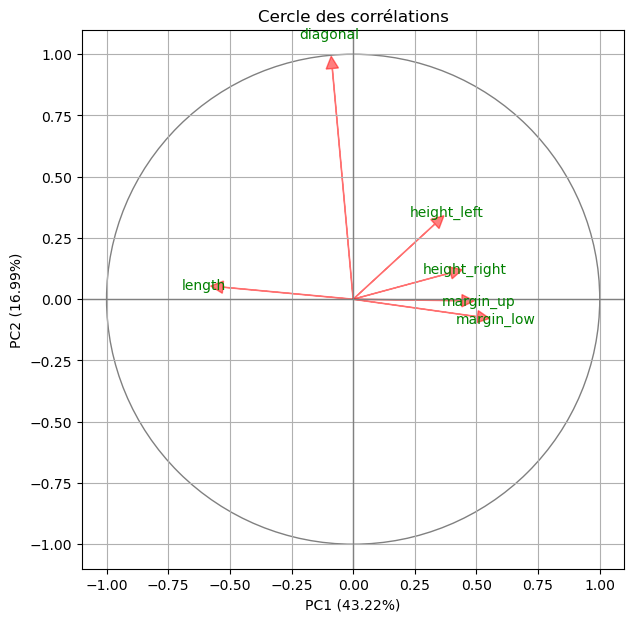

In [71]:
# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Calcul des pourcentages de variance expliquée
pc1_variance = pca.explained_variance_ratio_[0] * 100
pc2_variance = pca.explained_variance_ratio_[1] * 100

# Ajout des vecteurs au cercle des corrélations
for i in range(len(df_billets.columns)):
    plt.arrow(0, 0, pca.components_.T[i, 0], pca.components_.T[i, 1],
              head_width=0.05, head_length=0.05, color='r',
              alpha=0.5)
    plt.text(pca.components_.T[i, 0] * 1.15,
             pca.components_.T[i, 1] * 1.15, 
             df_billets.columns[i], color='g', ha='center',
             va='center')

# Définition des limites et des étiquettes du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'PC1 ({pc1_variance:.2f}%)')
plt.ylabel(f'PC2 ({pc2_variance:.2f}%)')
plt.title('Cercle des corrélations')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()

# Affichage du graphique
plt.show()

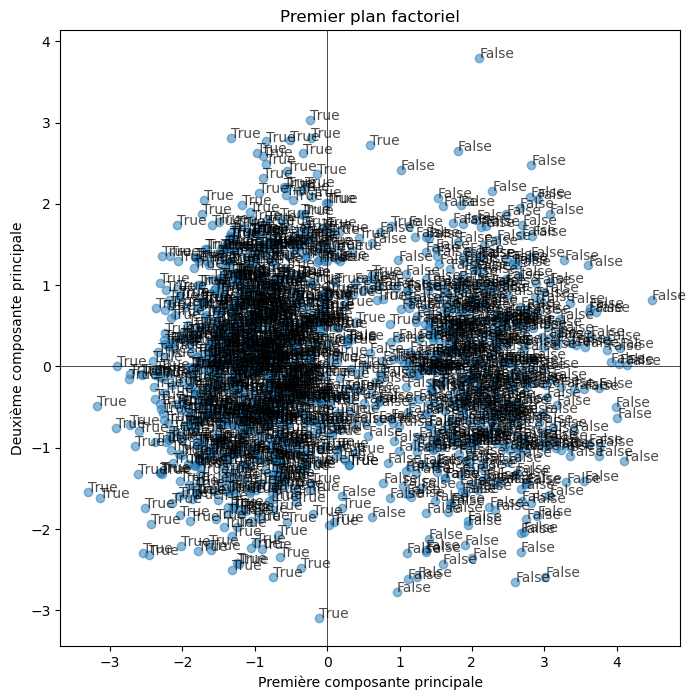

In [72]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coord[:, 0], coord[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (index)
for i, ind in enumerate(df_billets.index):
    ax.annotate(ind, (coord[i, 0], coord[i, 1]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()


In [73]:
# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Calcul des pourcentages de variance expliquée
pc3_variance = pca.explained_variance_ratio_[2] * 100
pc4_variance = pca.explained_variance_ratio_[3] * 100

# Ajout des vecteurs au cercle des corrélations pour PC3 et PC4
for i in range(len(df_billets.columns)):
    plt.arrow(0, 0, pca.components_.T[i, 2], pca.components_.T[i, 3],
              head_width=0.05, head_length=0.05, color='r',
              alpha=0.5)
    plt.text(pca.components_.T[i, 2] * 1.15,
             pca.components_.T[i, 3] * 1.15, 
             df_billets.columns[i], color='g', ha='center',
             va='center')

# Définition des limites et des étiquettes du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'PC3 ({pc3_variance:.2f}%)')
plt.ylabel(f'PC4 ({pc4_variance:.2f}%)')
plt.title('Cercle des corrélations pour PC3 et PC4')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()

# Affichage du graphique
plt.show()


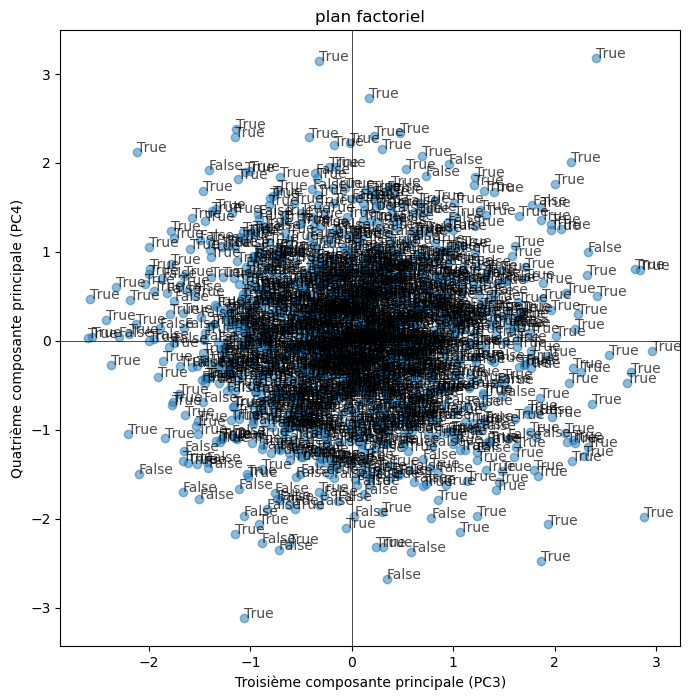

In [74]:
# Deuxième plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coord[:, 2], coord[:, 3], alpha=0.5)  # Utilisation des composantes PC3 et PC4

# Ajouter des étiquettes pour chaque point (index)
for i, ind in enumerate(df_billets.index):
    ax.annotate(ind, (coord[i, 2], coord[i, 3]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Troisième composante principale (PC3)')
ax.set_ylabel('Quatrième composante principale (PC4)')

# Titre du graphique
plt.title('plan factoriel')

# Afficher le graphique
plt.show()


In [75]:
# Création d'un DataFrame avec les composantes principales
df_pca_components = pd.DataFrame(data=coord[:, :4], index=df_billets.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Affichage du DataFrame avec les composantes principales
print(df_pca_components)

                 PC1       PC2       PC3       PC4
is_genuine                                        
True        1.647531  0.745090  2.407075  3.176855
True       -2.017063 -2.206787 -1.001693  0.074235
True       -0.970914  2.622631  1.193695 -0.924340
True       -1.370917 -1.819649  0.652691  0.826522
True        0.154675 -0.569006  0.852416 -1.789694
...              ...       ...       ...       ...
False       1.098659  0.942175  1.166470 -0.513335
False       1.346119  0.519421 -0.290982  0.007617
False       3.986639 -0.500889  0.261670 -0.977512
False       2.821963  2.474030 -0.828441 -0.109803
False       2.101963  0.062390  0.201240  0.467967

[1500 rows x 4 columns]


In [76]:
# Réinitialiser l'index pour rendre la colonne "is_genuine" à nouveau comme une variable
df_billets.reset_index(inplace=True)

df_billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True -0.486540     2.774123      3.163240    0.051286  -1.128325   
1           True -1.633729    -2.236535     -0.799668   -1.078937  -0.696799   
2           True  2.397823     1.504756     -1.291191   -0.129549  -0.912562   
3           True -1.961498    -0.399294      0.060498   -1.304982  -0.610494   
4           True -0.748754     0.836669     -1.414072   -0.672057   1.417677   
...          ...       ...          ...           ...         ...        ...   
1495       False  0.693427     1.538161     -0.492466    0.739374  -0.955715   
1496       False  0.398435     0.402412      0.767063    0.464078   1.072457   
1497       False -0.781531     1.437948      0.613462    1.773978   1.978661   
1498       False  2.299493     1.003691      1.504349    1.149661   1.762898   
1499       False -0.191548     0.836669      1.135706    0.933906   0.382015   

        length  
0     0.173651  
1     0.471666  
2     0.551901  
3     0.953075  
4    -0.158750  
...        ...  
1495 -1.683213  
1496 -0.445303  
1497 -2.714803  
1498 -1.385197  
1499 -1.362273  

[1500 rows x 7 columns]

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Classification non supervisée : K-means  </h2>
</div>

In [77]:
X = df_billets[['length', 'margin_low']]
y = df_billets['is_genuine']

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.   Choisir le nombre de clusters    </h3>
</div>

In [78]:
# Identifier le nombre de clusters optimal
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\clust

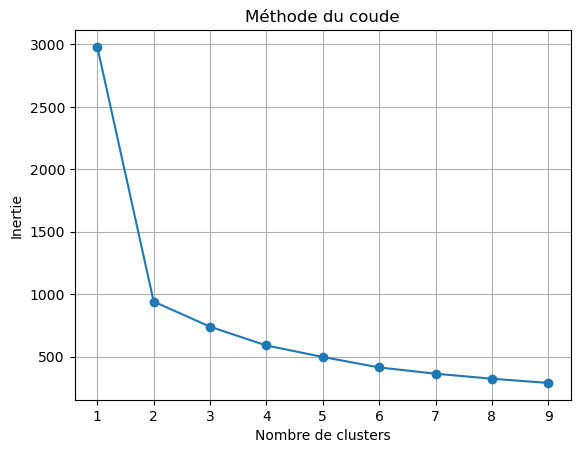

In [79]:
# Tracer le graphique d'inertie en fonction du nombre de clusters
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1   Définir le modèle    </h3>
</div>

In [80]:
# Instancier le modèle KMeans
kmeans = KMeans(n_clusters=2, random_state=42)  # Vous devez spécifier le nombre de clusters
model = kmeans.fit(X)
# Effectuer le clustering KMeans et obtenir les labels des clusters
y_kmeans = model.fit_predict(X)

# Récupération des clusters et des centroïdes de clusters
clusters = model.labels_
centroids = model.cluster_centers_

C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2   Visualisation des centroides    </h3>
</div>

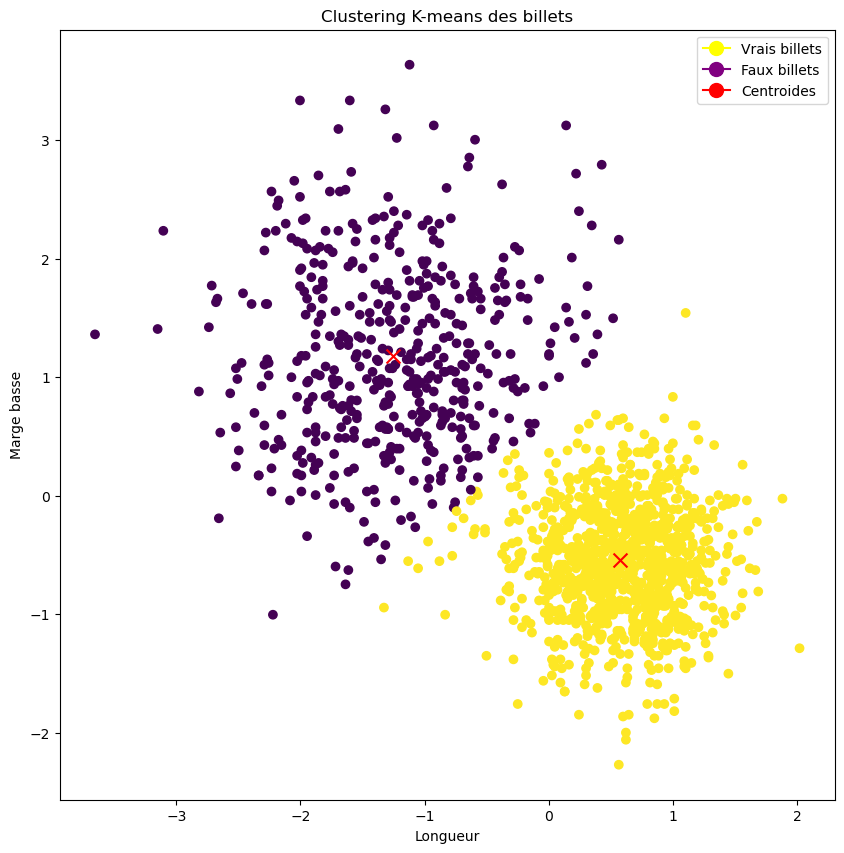

In [81]:
# Visualisation de Kmeans avec les centroides 
plt.figure(figsize=(10, 10))
plt.scatter(X['length'], X['margin_low'], c=y_kmeans, cmap='viridis', marker='o', label='billets')

# Centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroides')


# Ajouter une légende pour les vrais et faux billets
plt.legend(handles=[plt.Line2D([], [], marker='o', color='yellow', markersize=10, label='Vrais billets'),
                    plt.Line2D([], [], marker='o', color='purple', markersize=10, label='Faux billets'),
                    plt.Line2D([], [], marker='o', color='red', markersize=10, label='Centroides')], loc='best')

plt.title('Clustering K-means des billets')
plt.xlabel('Longueur')
plt.ylabel('Marge basse')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.3   Analyse des performances du modèle  </h3>
</div>

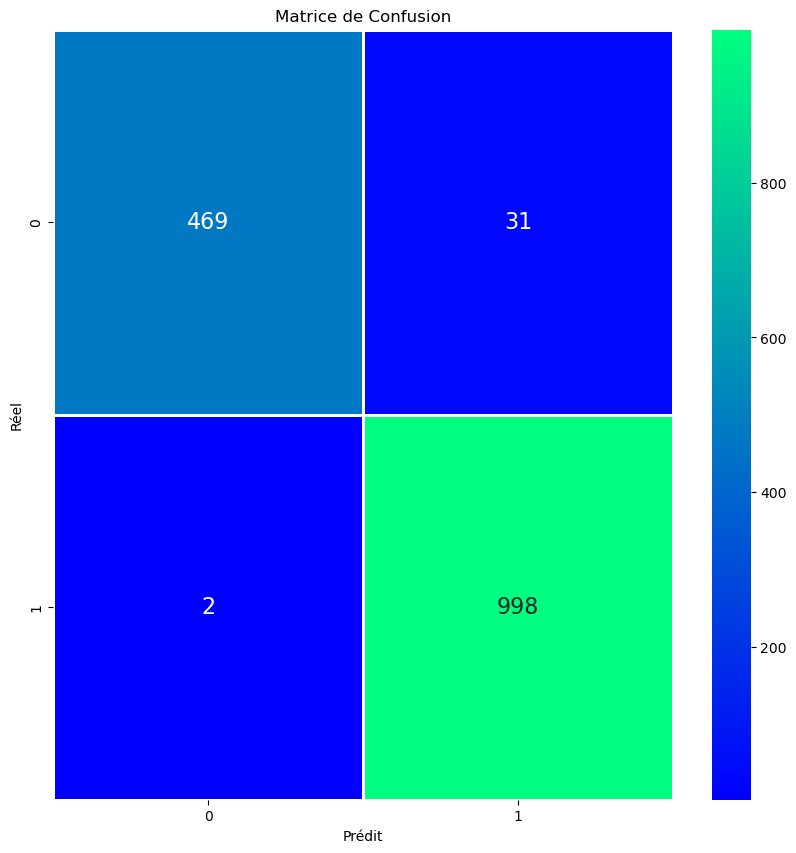

In [82]:
# Matrice de confusion
cm = confusion_matrix(y, y_kmeans)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', linewidths=1, annot_kws={"size": 16}, cmap='winter')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [83]:
# Récupération des valeurs de la matrice de confusion
vn, fp, fn, vp = cm.ravel()

# Calcul des pourcentages
taux_vrai_positif = vp / (vp + fn)*100
taux_faux_positif = fp / (fp + vn)*100
taux_vrai_negatif = vn / (vn + fp)*100
taux_faux_negatif = fn / (fn + vp)*100

# Affichage des résultats
print(f"Vrai positif : {taux_vrai_positif}%")
print(f"Faux positif : {taux_faux_positif}%")
print(f"Vrai négatif : {taux_vrai_negatif}%")
print(f"Faux négatif : {taux_faux_negatif}%")

Vrai positif : 99.8%
Faux positif : 6.2%
Vrai négatif : 93.8%
Faux négatif : 0.2%


In [84]:
# Calcul de l'ARI
ari = adjusted_rand_score(y, y_kmeans)

# Affichage de l'ARI
print("Adjusted Rand Index (ARI) :", ari)

Adjusted Rand Index (ARI) : 0.9125466346926879


L'ARI varie de -1 à 1, où une valeur proche de 1 indique une concordance parfaite entre les deux ensembles d'étiquettes, une valeur proche de 0 indique une similarité aléatoire et une valeur proche de -1 indique une discordance complète.

In [85]:
# Nous calculons plusieurs indicateurs pour évaluer la performance du modèle.
accuracy_KMeans = accuracy_score(y, y_kmeans)
precision_KMeans = precision_score(y, y_kmeans)
recall_KMeans = recall_score(y, y_kmeans)
f1_KMeans = f1_score(y, y_kmeans)
print(f'Accuracy: {accuracy_KMeans}')
print(f'Precision: {precision_KMeans}')
print(f'Recall: {recall_KMeans}')
print(f'F1 Score: {f1_KMeans}')

Accuracy: 0.978
Precision: 0.9698736637512148
Recall: 0.998
F1 Score: 0.9837358304583538


- **Accuracy** : L'exactitude est la proportion de prédictions correctes parmi le total des prédictions. C'est un bon indicateur lorsque les classes sont équilibrées : 
     $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

     Où TP est le nombre de vrais positifs, TN est le nombre de vrais négatifs, FP est le nombre de faux positifs et FN est le nombre de faux négatifs.

- **Precision** : La précision est la proportion de prédictions positives qui sont réellement positives. Elle est utilisée lorsque le coût des faux positifs est élevé : 

     $$Precision = \frac{TP}{TP + FP}$$

- **Recall** (ou sensibilité) : Le rappel est la proportion de vrais positifs qui sont correctement prédits comme tels. Il est utilisé lorsque le coût des faux négatifs est élevé. : 
     $$Recall = \frac{TP}{TP + FN}$$

- **F1-score** : Le score F1 est une moyenne harmonique de la précision et du rappel. Il donne un équilibre entre ces deux mesures. :
 
     $$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Régression logistique  </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1. Construction et entraînement du modèle</h3>
</div>

In [86]:
# Sélectionner les variables explicatives et la variable cible 
X = df_billets.drop('is_genuine', axis=1)
y = df_billets["is_genuine"]
index = df_billets.index
features = df_billets.columns

In [87]:
# Centrage et réduction des variables
#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)

Division du jeu de données en un ensemble d'entraînement et un ensemble de test. 

- ``test_size=0.2`` signifie que 20% des données sont réservées pour l'ensemble de test.
- ``random_state=17`` est utilisé pour garantir que la division des données soit reproductible. 

In [88]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [89]:
# Affichage de la forme des différents ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 6), (300, 6), (1200,), (300,))

In [90]:
# Vérification des proportions de la variable cible entre le train et le test
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(True     0.6625
 False    0.3375
 Name: is_genuine, dtype: float64,
 True     0.683333
 False    0.316667
 Name: is_genuine, dtype: float64)

In [91]:
# Nous créons d'abord le modèle de régression logistique et l'entraînons sur l'ensemble d'entraînement.
model_rl = LogisticRegression()
model_rl.fit(X_train, y_train)

LogisticRegression()

In [92]:
coeficients = model_rl.coef_[0]
coeficients

array([ 0.12861133, -0.47501947, -0.70722003, -2.64887118, -1.66175148,
        3.42306208])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2. Prédiction sur l'ensemble de test</h3>
</div>

In [93]:
# Prédiction sur l'ensemble de test
y_test_pred = model_rl.predict(X_test)

In [94]:
# Prédiction des probabilités de la classe positive
y_test_prob = model_rl.predict_proba(X_test)[:, 1]

 <div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3. Prédiction sur l'ensemble de train</h3>
</div>

In [95]:
#y_train_pred = model_rl.predict(X_train)
y_train_pred = model_rl.predict(X_train)

 <div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">4. Évaluation du modèle train</h3>
</div>

In [96]:
# Calcul de l'exactitude sur l'ensemble d'entraînement
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Exactitude sur l'ensemble d'entraînement:", accuracy_train)

# Calcul de la précision sur l'ensemble d'entraînement
precision_train = precision_score(y_train, y_train_pred)
print("Précision sur l'ensemble d'entraînement:", precision_train)

# Calcul du rappel sur l'ensemble d'entraînement
recall_train = recall_score(y_train, y_train_pred)
print("Rappel sur l'ensemble d'entraînement:", recall_train)

# Calcul du score F1 sur l'ensemble d'entraînement
f1_train = f1_score(y_train, y_train_pred)
print("Score F1 sur l'ensemble d'entraînement:", f1_train)

# Calcul de l'aire sous la courbe ROC (AUC) sur l'ensemble d'entraînement
roc_auc_train = roc_auc_score(y_train, y_train_pred)
print("AUC sur l'ensemble d'entraînement:", roc_auc_train)

Exactitude sur l'ensemble d'entraînement: 0.99
Précision sur l'ensemble d'entraînement: 0.9899874843554443
Rappel sur l'ensemble d'entraînement: 0.9949685534591195
Score F1 sur l'ensemble d'entraînement: 0.9924717691342533
AUC sur l'ensemble d'entraînement: 0.9876077335196832


In [97]:
#from sklearn.metrics import classification_report

# Générer le rapport de classification
report_train = classification_report(y_train, y_train_pred)

# Afficher le rapport de classification
print(report_train)

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       405
        True       0.99      0.99      0.99       795

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



In [98]:
#from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print(confusion_matrix_train)

[[397   8]
 [  4 791]]


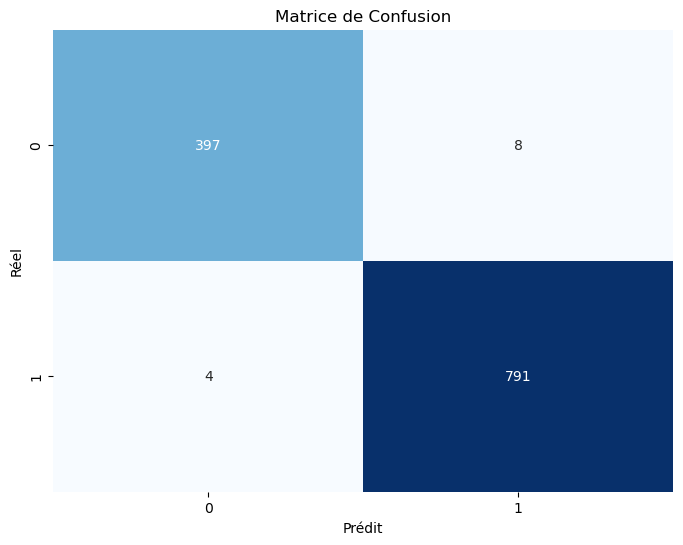

In [99]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [100]:
# Décomposition de la matrice de confusion
TN_train, FP_train, FN_train, TP_train = confusion_matrix_train.ravel()

# Calcul des taux pour l'ensemble d'entraînement
TPR_train = TP_train / (TP_train + FN_train) * 100  # Taux de vrais positifs (rappel)
FPR_train = FP_train / (FP_train + TN_train) * 100  # Taux de faux positifs
TNR_train = TN_train / (TN_train + FP_train) * 100  # Taux de vrais négatifs (spécificité)
FNR_train = FN_train / (FN_train + TP_train) * 100  # Taux de faux négatifs

# Affichage des taux pour l'ensemble d'entraînement
print(f"Taux de vrais positifs (rappel) : {TPR_train}%")
print(f"Taux de faux positifs : {FPR_train}%")
print(f"Taux de vrais négatifs (spécificité) : {TNR_train}%")
print(f"Taux de faux négatifs : {FNR_train}%")


Taux de vrais positifs (rappel) : 99.49685534591195%
Taux de faux positifs : 1.9753086419753085%
Taux de vrais négatifs (spécificité) : 98.0246913580247%
Taux de faux négatifs : 0.5031446540880503%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">5. Hypothèses</h3>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">6. Évaluation du modèle test</h3>
</div>

### La matrice de confusion nous permet de visualiser la performance du modèle en termes de faux positifs, de faux négatifs, de vrais positifs et de vrais négatifs.

In [101]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

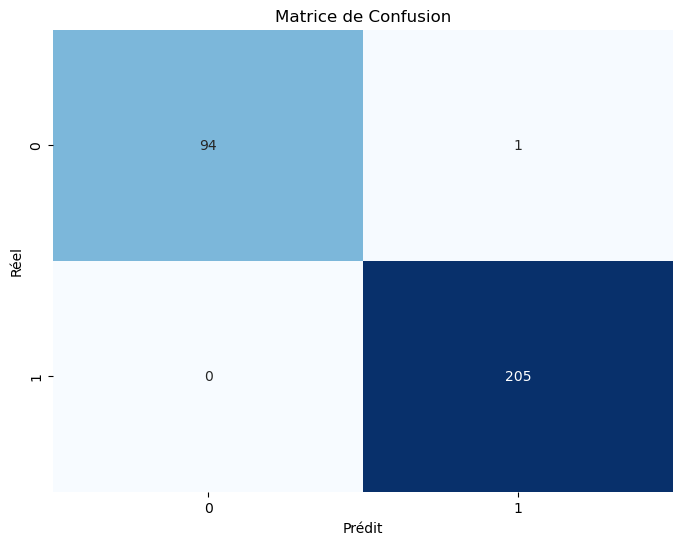

In [102]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

205 billets détectés correctement comme vrai
94 billets détectés correctement comme faux 
1 billets détectés incorrectement comme vrais alors qu'ils sont faux
0 billets détectés incorrectement comme faux alors qu'ils sont vrais

In [103]:
# Décomposition de la matrice de confusion
TN_test, FP_test, FN_test, TP_test = cm.ravel()

# Calcul des taux pour l'ensemble de test
TPR_test = TP_test / (TP_test + FN_test) * 100  # Taux de vrais positifs (rappel)
FPR_test = FP_test / (FP_test + TN_test) * 100  # Taux de faux positifs
TNR_test = TN_test / (TN_test + FP_test) * 100  # Taux de vrais négatifs (spécificité)
FNR_test = FN_test / (FN_test + TP_test) * 100  # Taux de faux négatifs

# Affichage des taux pour l'ensemble de test
print(f"Taux de vrais positifs : {TPR_test}%")
print(f"Taux de faux positifs : {FPR_test}%")
print(f"Taux de vrais négatifs : {TNR_test}%")
print(f"Taux de faux négatifs : {FNR_test}%")

Taux de vrais positifs : 100.0%
Taux de faux positifs : 1.0526315789473684%
Taux de vrais négatifs : 98.94736842105263%
Taux de faux négatifs : 0.0%


In [104]:
# Calcul de l'exactitude sur l'ensemble d'entraînement
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Exactitude sur l'ensemble de test:", accuracy_test)

# Calcul de la précision sur l'ensemble d'entraînement
precision_test = precision_score(y_test, y_test_pred)
print("Précision sur l'ensemble de test:", precision_test)

# Calcul du rappel sur l'ensemble d'entraînement
recall_test = recall_score(y_test, y_test_pred)
print("Rappel sur l'ensemble de test:", recall_test)

# Calcul du score F1 sur l'ensemble d'entraînement
f1_test = f1_score(y_test, y_test_pred)
print("Score F1 sur l'ensemble de test:", f1_test)

# Calcul de l'aire sous la courbe ROC (AUC) sur l'ensemble d'entraînement
roc_auc_train = roc_auc_score(y_test, y_test_pred)
print("AUC sur l'ensemble de test:", roc_auc_train)

Exactitude sur l'ensemble de test: 0.9966666666666667
Précision sur l'ensemble de test: 0.9951456310679612
Rappel sur l'ensemble de test: 1.0
Score F1 sur l'ensemble de test: 0.9975669099756691
AUC sur l'ensemble de test: 0.9947368421052631


- **ROC Curve** : La courbe ROC (Receiver Operating Characteristic) est un graphique qui illustre la performance d'un modèle de classification pour tous les seuils de classification. Elle trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1-spécificité). 


- **AUC** : L'AUC (Area Under the Curve) est l'aire sous la courbe ROC. Elle fournit une mesure agrégée de la performance du modèle de classification à tous les seuils de classification possibles. Elle peut aussi être interprétée comme la probabilité qu'un classificateur rangera un exemple positif aléatoirement choisi plus haut qu'un exemple négatif aléatoirement choisi. Les valeurs vont de 0 à 1, où une valeur de 0,5 correspond à un modèle aléatoire et une valeur de 1 correspond à un modèle parfait.


- **ROC-AUC score** : Le score ROC-AUC est simplement la valeur numérique pour l'AUC. Il est utilisé comme une mesure de la performance globale d'un modèle de classification.

In [105]:
# Calculer le taux de faux positifs et le taux de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC et l'AUC
plt.figure()
plt.plot(fpr, tpr, label="ROC AUC  = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")

plt.title("Courbe ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend(loc="lower right")
plt.show()

Trés bonne capacité à distinguer les classes 'Vrais billets positifs' et 'Faux billets négatifs'

Modèle produit trés peut de faux positifs et identifie presque tous les vrais positifs

In [106]:
# Générer le rapport de classification
report = classification_report(y_test, y_test_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

       False       1.00      0.99      0.99        95
        True       1.00      1.00      1.00       205

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Choix du Modèle</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1. Différence des deux modèles</h3>
</div>

In [107]:

# Résultats pour KMeans
results_kmeans = {
    'Model': ['KMeans'],
    'Accuracy': [accuracy_KMeans],
    'Precision': [precision_KMeans],
    'Recall': [recall_KMeans],
    'F1 Score': [f1_KMeans],
    'Adjusted Rand Index (ARI)': [ari]
}
# Calcul du R² pour la régression logistique
r_squared = model_rl.score(X_test, y_test)

# Résultats pour la régression logistique
results_logistic_regression = {
    'Model': ['Régression Logistique'],
    'Accuracy': [accuracy_train],
    'Precision': [precision_train],
    'Recall': [recall_train],
    'F1 Score': [f1_train],
    'R-squared': [r_squared]  # Ajout du coefficient de détermination
}

# Création de DataFrames à partir des résultats
df_kmeans = pd.DataFrame(results_kmeans)
df_logistic_regression = pd.DataFrame(results_logistic_regression)

# Concaténation des DataFrames pour affichage
df_results = pd.concat([df_kmeans, df_logistic_regression], ignore_index=True)

# Affichage des résultats
print(df_results)

                   Model  Accuracy  Precision    Recall  F1 Score  \
0                 KMeans     0.978   0.969874  0.998000  0.983736   
1  Régression Logistique     0.990   0.989987  0.994969  0.992472   

   Adjusted Rand Index (ARI)  R-squared  
0                   0.912547        NaN  
1                        NaN   0.996667  


Dans notre contexte de détection de faux billets, où il est crucial de détecter tous les faux billets, la Régression Logistique semble être le meilleur choix. 

En examinant les performances des deux modèles, nous constatons que la Régression Logistique présente des scores plus élevés dans plusieurs métriques clés par rapport à KMeans.

1. Une meilleure exactitude (Accuracy) avec un score de 0.987 contre 0.978 pour KMeans, ce qui signifie qu'elle prédit correctement une plus grande proportion de faux billets.

2. Une précision (Precision) supérieure (0.995 contre 0.970).

3. Un score F1 (F1 Score) plus élevé (0.990 contre 0.984).

La Régression Logistique est plus précise et elle trouve un meilleur équilibre entre la précision et le rappel. 

Par conséquent, en prenant en compte l'ensemble de ces résultats, la Régression Logistique semble offrir une meilleure performance globale pour la détection de faux billets par rapport à KMeans.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Algorithmes de classification supervisée </h2>
</div>

In [108]:
def detection_faux_billets(csv_file, model):
    """
    Cette fonction prend en entrée un fichier CSV et un modèle de régression logistique entraîné, 
    et renvoie un DataFrame avec des prédictions d'authenticité pour chaque billet dans le fichier CSV.

    Paramètres :
    csv_file (str) : Le chemin vers le fichier CSV. Le fichier CSV doit contenir une colonne 'id' 
                     et des colonnes pour chaque variable indépendante.
    model : Un modèle de Machine Learning entraîné.

    Retourne :
    df (DataFrame) : Un DataFrame contenant les données originales du fichier CSV, ainsi qu'une 
                     colonne 'Authenticite' avec des prédictions d'authenticité pour chaque billet 
                     ('Vrai' pour authentique, 'Faux' pour non authentique), et une colonne 
                     'Probabilite_authenticite' avec la probabilité associée à chaque prédiction.
    """
    # Lire le fichier CSV
    df = pd.read_csv(csv_file)

    # Mettre 'id' en index
    df.set_index('id', inplace=True)

    # Normaliser les données
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    # Faire des prédictions
    y_pred= model.predict(X)

    # Calculer les probabilités
    probabilites = model.predict_proba(X)

    # Convertir les prédictions en "vrai" ou "faux"
    y_pred = ['Vrai' if pred == 1 else 'Faux' for pred in y_pred]

    # Ajouter les prédictions et les probabilités au DataFrame
    df['Authenticite'] = y_pred
    df['Probabilite_authenticite'] = probabilites[:, 1]

    return df

In [111]:
detection_faux_billets('billets_production_test.csv', model_rl)

C:\Users\33621\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
A_1    171.76       104.01        103.54        5.21       3.30  111.42   
A_2    171.87       104.17        104.13        6.00       3.31  112.09   
A_3    172.00       104.58        104.29        4.99       3.39  111.57   
A_4    172.49       104.55        104.34        4.44       3.03  113.20   
A_5    171.65       103.63        103.56        3.77       3.16  113.33   

    Authenticite  Probabilite_authenticite  
id                                          
A_1         Faux                  0.052461  
A_2         Faux                  0.013192  
A_3         Faux                  0.008049  
A_4         Vrai                  0.999867  
A_5         Vrai                  0.999997

In [112]:
soutenance = pd.read_csv('billets_test.csv', delimiter=';')

In [113]:
detection_faux_billets('billets_test.csv', model_rl)

C:\Users\33621\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


diagonal  height_left  height_right  margin_low  margin_up  length  \
id                                                                        
B_1    172.09       103.95        103.73        4.39       3.09  113.19   
B_2    171.52       104.17        104.03        5.27       3.16  111.82   
B_3    171.78       103.80        103.75        3.81       3.24  113.39   
B_4    172.02       104.08        103.99        5.57       3.30  111.10   
B_5    171.79       104.34        104.37        5.00       3.07  111.87   

    Authenticite  Probabilite_authenticite  
id                                          
B_1         Vrai                  0.999954  
B_2         Faux                  0.098052  
B_3         Vrai                  0.999972  
B_4         Faux                  0.000254  
B_5         Faux                  0.381243